In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srikresna","key":"c90f9c19af6b129911ae9410dd23cde4"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 99% 222M/225M [00:06<00:00, 40.9MB/s]
100% 225M/225M [00:06<00:00, 38.9MB/s]


In [ ]:
!unzip flowers-recognition.zip

In [ ]:
import os

os.listdir('/content/flowers')

['daisy', 'rose', 'tulip', 'sunflower', 'dandelion']

In [ ]:
print(len(os.listdir('/content/flowers/rose')))
print(len(os.listdir('/content/flowers/tulip')))
print(len(os.listdir('/content/flowers/daisy')))
print(len(os.listdir('/content/flowers/sunflower')))
print(len(os.listdir('/content/flowers/dandelion')))

784
984
764
733
1052


In [ ]:
from pathlib import Path

dataset = Path('/content/flowers')

images = list(dataset.glob('**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], images))

In [ ]:
import pandas as pd

image = pd.Series(images).astype(str)
labels = pd.Series(labels)

df = pd.concat([image, labels], axis=1)

df.columns = ['image', 'label']
df


,image,label
0,/content/flowers/daisy/14245834619_153624f836.jpg,daisy
1,/content/flowers/daisy/3546455114_cd2dea5e02.jpg,daisy
2,/content/flowers/daisy/5673728_71b8cb57eb.jpg,daisy
3,/content/flowers/daisy/520752848_4b87fb91a4.jpg,daisy
4,/content/flowers/daisy/4610018126_21f438d2dc_m...,daisy
...,...,...
4312,/content/flowers/dandelion/4844697927_c70d644f...,dandelion
4313,/content/flowers/dandelion/10200780773_c6051a7...,dandelion
4314,/content/flowers/dandelion/7884440256_91c03373...,dandelion
4315,/content/flowers/dandelion/34323484476_6406ee1...,dandelion


In [ ]:
new_df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
new_df

,image,label
0,/content/flowers/daisy/14245834619_153624f836.jpg,daisy
1,/content/flowers/daisy/3546455114_cd2dea5e02.jpg,daisy
2,/content/flowers/daisy/5673728_71b8cb57eb.jpg,daisy
3,/content/flowers/daisy/520752848_4b87fb91a4.jpg,daisy
4,/content/flowers/daisy/4610018126_21f438d2dc_m...,daisy
...,...,...
4312,/content/flowers/dandelion/4844697927_c70d644f...,dandelion
4313,/content/flowers/dandelion/10200780773_c6051a7...,dandelion
4314,/content/flowers/dandelion/7884440256_91c03373...,dandelion
4315,/content/flowers/dandelion/34323484476_6406ee1...,dandelion


In [ ]:
new_df.label.value_counts()

dandelion    1052
tulip         984
rose          784
daisy         764
sunflower     733
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(new_df, test_size=0.2,random_state=123)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale = 1./255,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train,
                                                 x_col='image',
                                                 y_col='label',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='categorical',
                                                 shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test,
                                                x_col='image',
                                                y_col='label',
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                shuffle=False)

Found 3453 validated image filenames belonging to 5 classes.
Found 864 validated image filenames belonging to 5 classes.


In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

In [ ]:
from tensorflow.keras.applications.efficientnet import *
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

# base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# for layer in base_model.layers:
#     layer.trainable = False

model = tf.keras.Sequential([
    EfficientNetB1(input_shape=(224, 224, 3), include_top=False, classes=5),
    Conv2D(12, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 7, 7, 1280)        6575239   
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 5, 12)          138252    
                                                                 
 global_average_pooling2d_1  (None, 12)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 6715800 (25.62 MB)
Trainable params: 665

In [ ]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

#Callback Function
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92):
            print("\nAccuracy and Val_Accuracy has reached 98%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #setelah 2 epoch, jika tidak ada kenaikan maka LR berkurang
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 4,
    verbose = 1,
    mode = 'auto'
)
history = model.fit(train,
                    validation_data=test,
                    epochs=50,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    batch_size=64
                    )

Epoch 1/50
108/108 [==============================] - 140s 751ms/step - loss: 0.6844 - accuracy: 0.7573 - val_loss: 2.1471 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 2/50
108/108 [==============================] - 78s 722ms/step - loss: 0.4000 - accuracy: 0.8633 - val_loss: 1.7559 - val_accuracy: 0.2326 - lr: 0.0010
Epoch 3/50
108/108 [==============================] - 77s 715ms/step - loss: 0.3362 - accuracy: 0.8839 - val_loss: 1.6887 - val_accuracy: 0.2176 - lr: 0.0010
Epoch 4/50
108/108 [==============================] - 78s 717ms/step - loss: 0.2596 - accuracy: 0.9134 - val_loss: 2.1453 - val_accuracy: 0.2639 - lr: 0.0010
Epoch 5/50
108/108 [==============================] - 77s 714ms/step - loss: 0.2668 - accuracy: 0.9082 - val_loss: 2.4256 - val_accuracy: 0.1562 - lr: 0.0010
Epoch 6/50
108/108 [==============================] - ETA: 0s - loss: 0.2425 - accuracy: 0.9180
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
108/108 [===========================

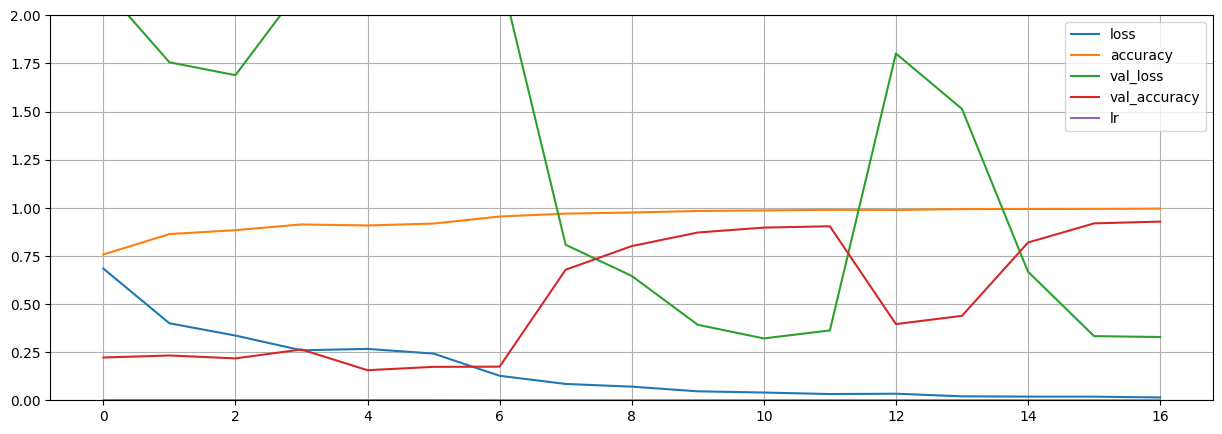

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0,2)

plt.show()

In [ ]:
 # Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Konversi
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('proyek-akhir-dicoding.tflite', 'wb') as f:
  f.write(tflite_model)